## DBSCAN clustering
> Comparison with k-means clustering

In [1]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

plt.style.use('fivethirtyeight')

from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

- DBSCAN 알고리즘 개요

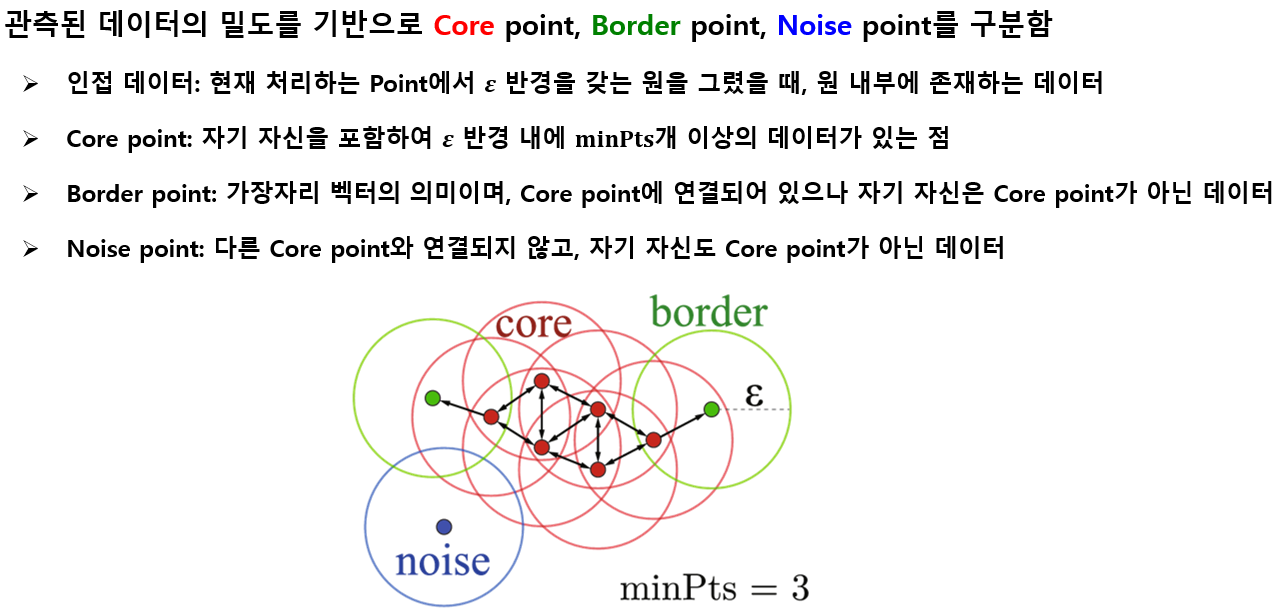

In [2]:
# sample data 생성

X, labels_true = make_circles(n_samples=1000, factor=0.3, noise=0.1) # factor: Scale factor between inner and outer circle in the range (0, 1)
X = StandardScaler().fit_transform(X)
X

array([[ 1.10678873,  1.62096185],
       [ 0.06357192,  0.49927912],
       [-0.79998475, -0.2932072 ],
       ...,
       [-1.90601009, -0.04001125],
       [-0.04637286,  0.74223321],
       [ 0.12030761, -0.2749114 ]])

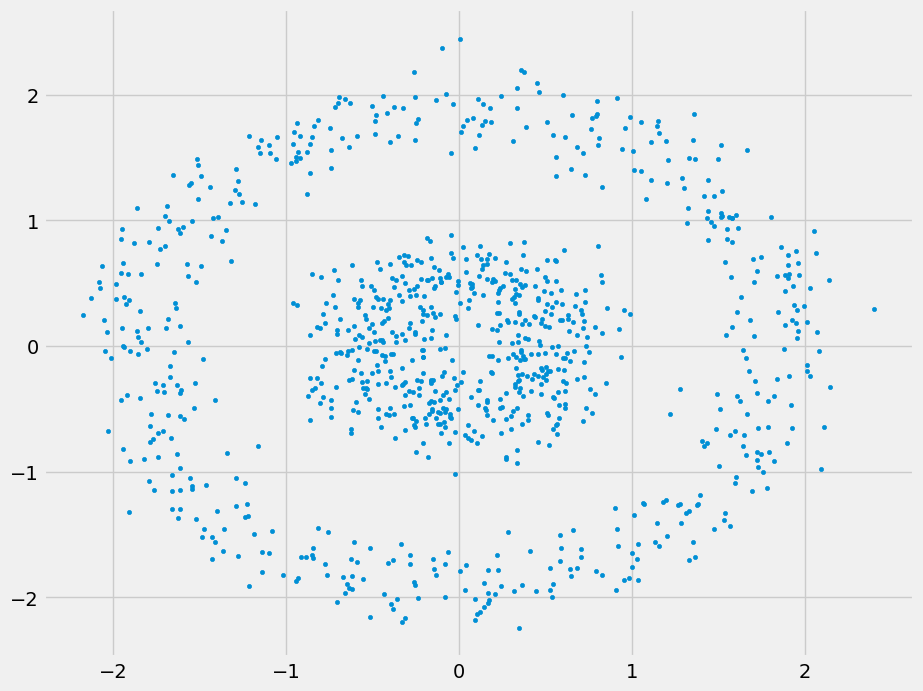

In [3]:
# Plotting

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

- k-means 알고리즘 개요 (비교군)

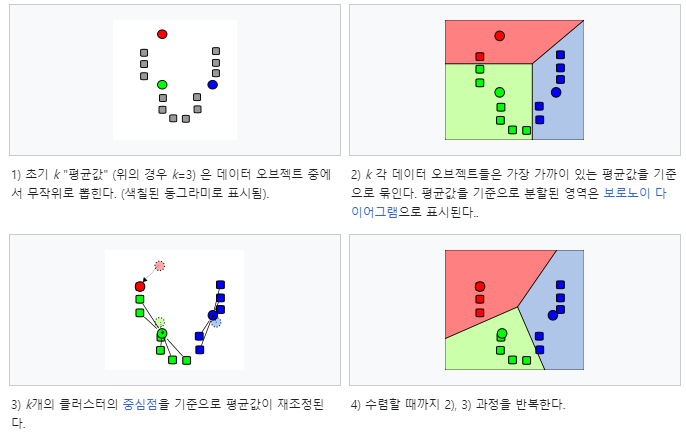

In [4]:
# comparison: k-means
'''
k-means++: k-means clustering 초기 값 설정을 위한 알고리즘
  * 원리: 무작위로 1개의 데이터를 중심점으로 선정한 후, 중심점으로부터의 거리가 최대한 멀리 떨어진 데이터를 다음 중심점으로 지정 (k개가 될 때까지 반복)
'''
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')

y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [5]:
'''
DBSCAN parameters:
  - eps: maximum distance two samples for one to be considered as in the neighborhood of the other.
  - min_samples: the number of samples in a neighborhood for a point to bbe considered as a core point.
'''
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool) # bool: True/False
core_samples_mask[db.core_sample_indices_] = True #core_sample_indices_: Indices of core samples
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

2
3


Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

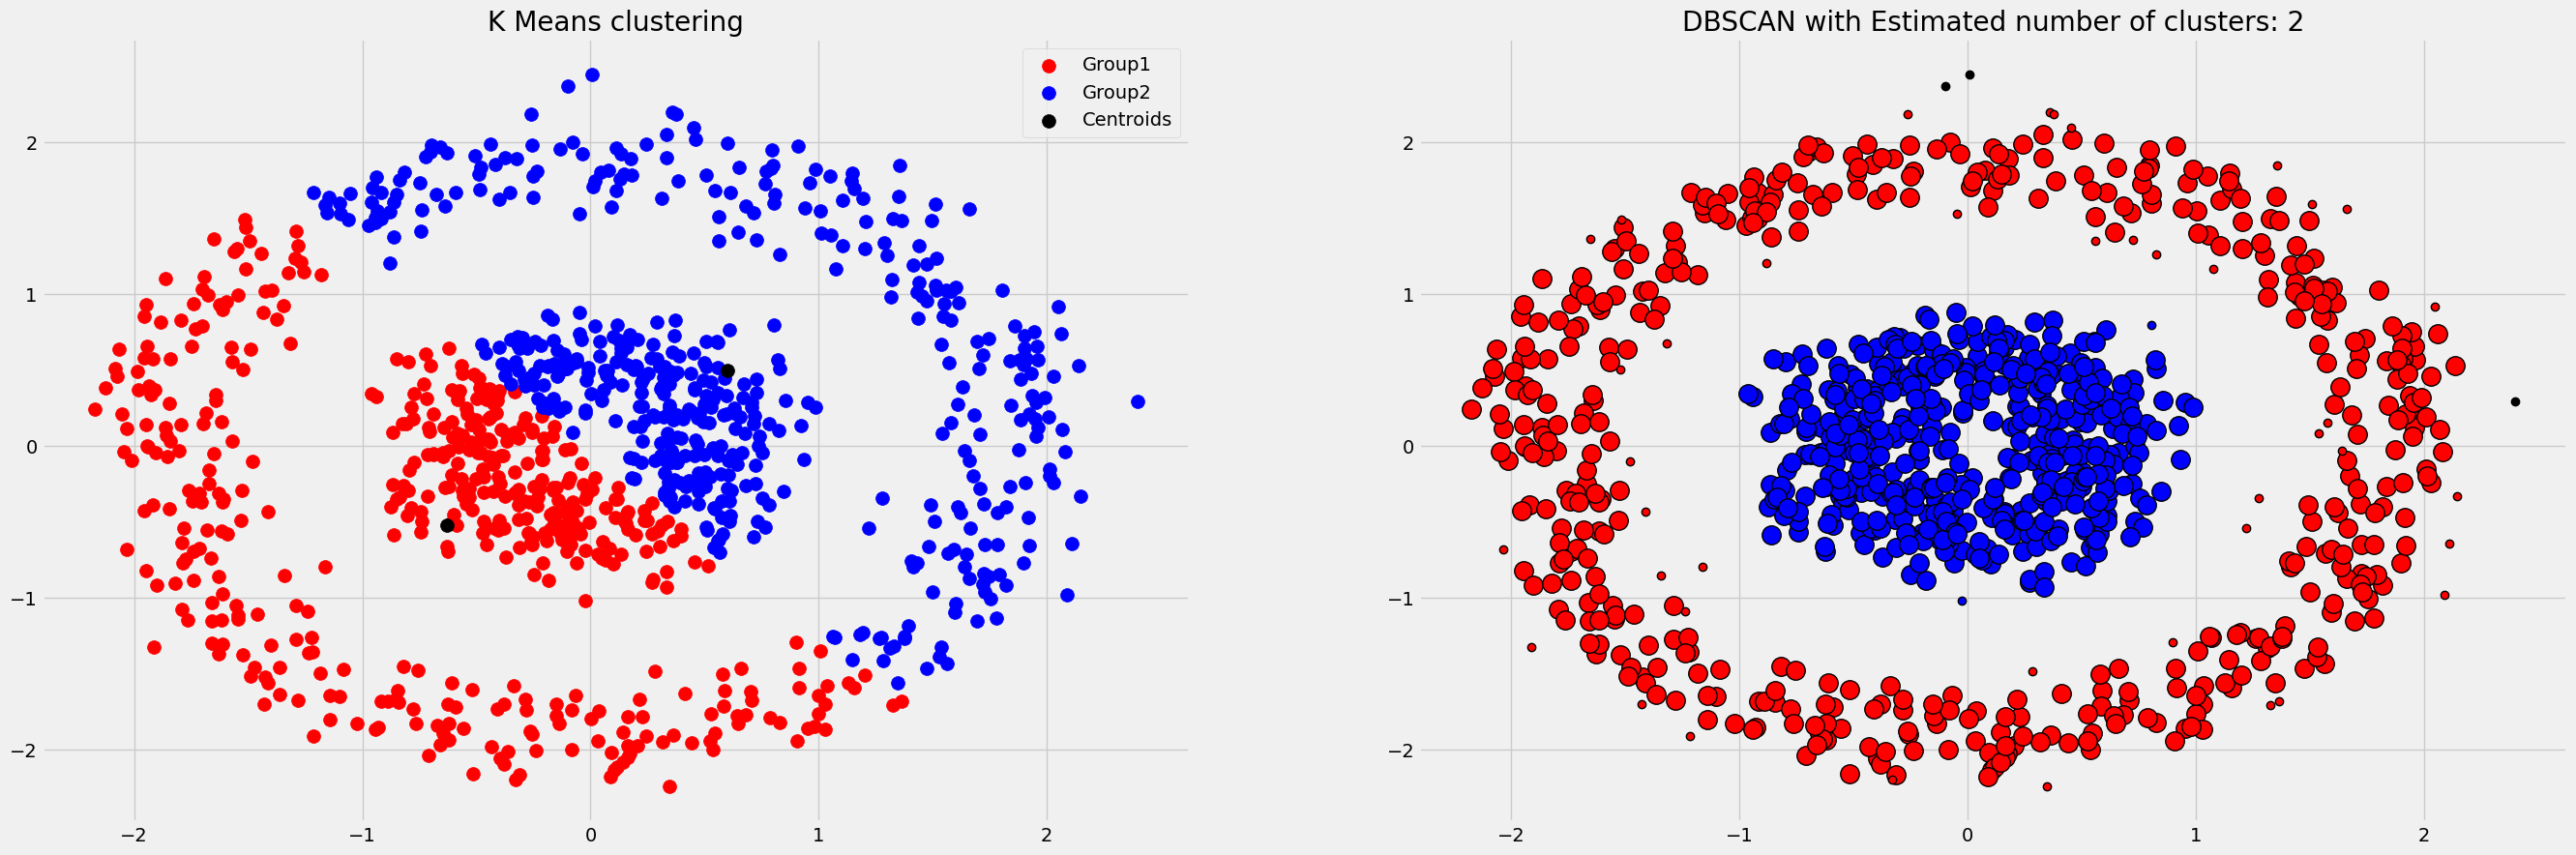

In [6]:
'''
K-means vs DBSCAN (make_circles dataset)
'''

fig, (ax1, ax2) = plt.subplots(ncols =2)
fig.set_figheight(10) # 높이
fig.set_figwidth(30) # 너비

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()

# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col), # markerfacecolor: marker 배경색
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)

In [7]:
# sample data 생성

X, labels_true = make_moons(n_samples=1000, noise=0.1)
X = StandardScaler().fit_transform(X)
X

array([[ 0.05475277, -1.09253137],
       [ 0.3827566 , -1.34267896],
       [ 0.43963116, -1.43729031],
       ...,
       [ 1.16963555, -1.43473095],
       [-1.41358046,  0.71299172],
       [-0.65210118, -0.39301298]])

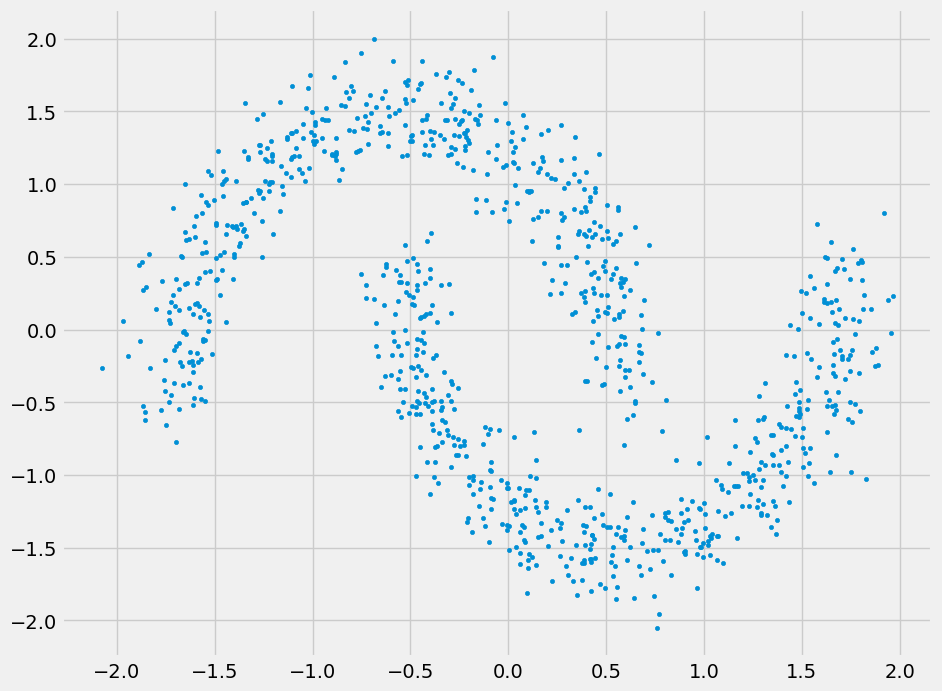

In [8]:
# Plotting

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

In [9]:
# comparison: k-means
optimal_k = 2
kmeans = KMeans(n_clusters = optimal_k, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

2
15


Text(0.5, 1.0, 'DBSCAN with Estimated number of clusters: 2')

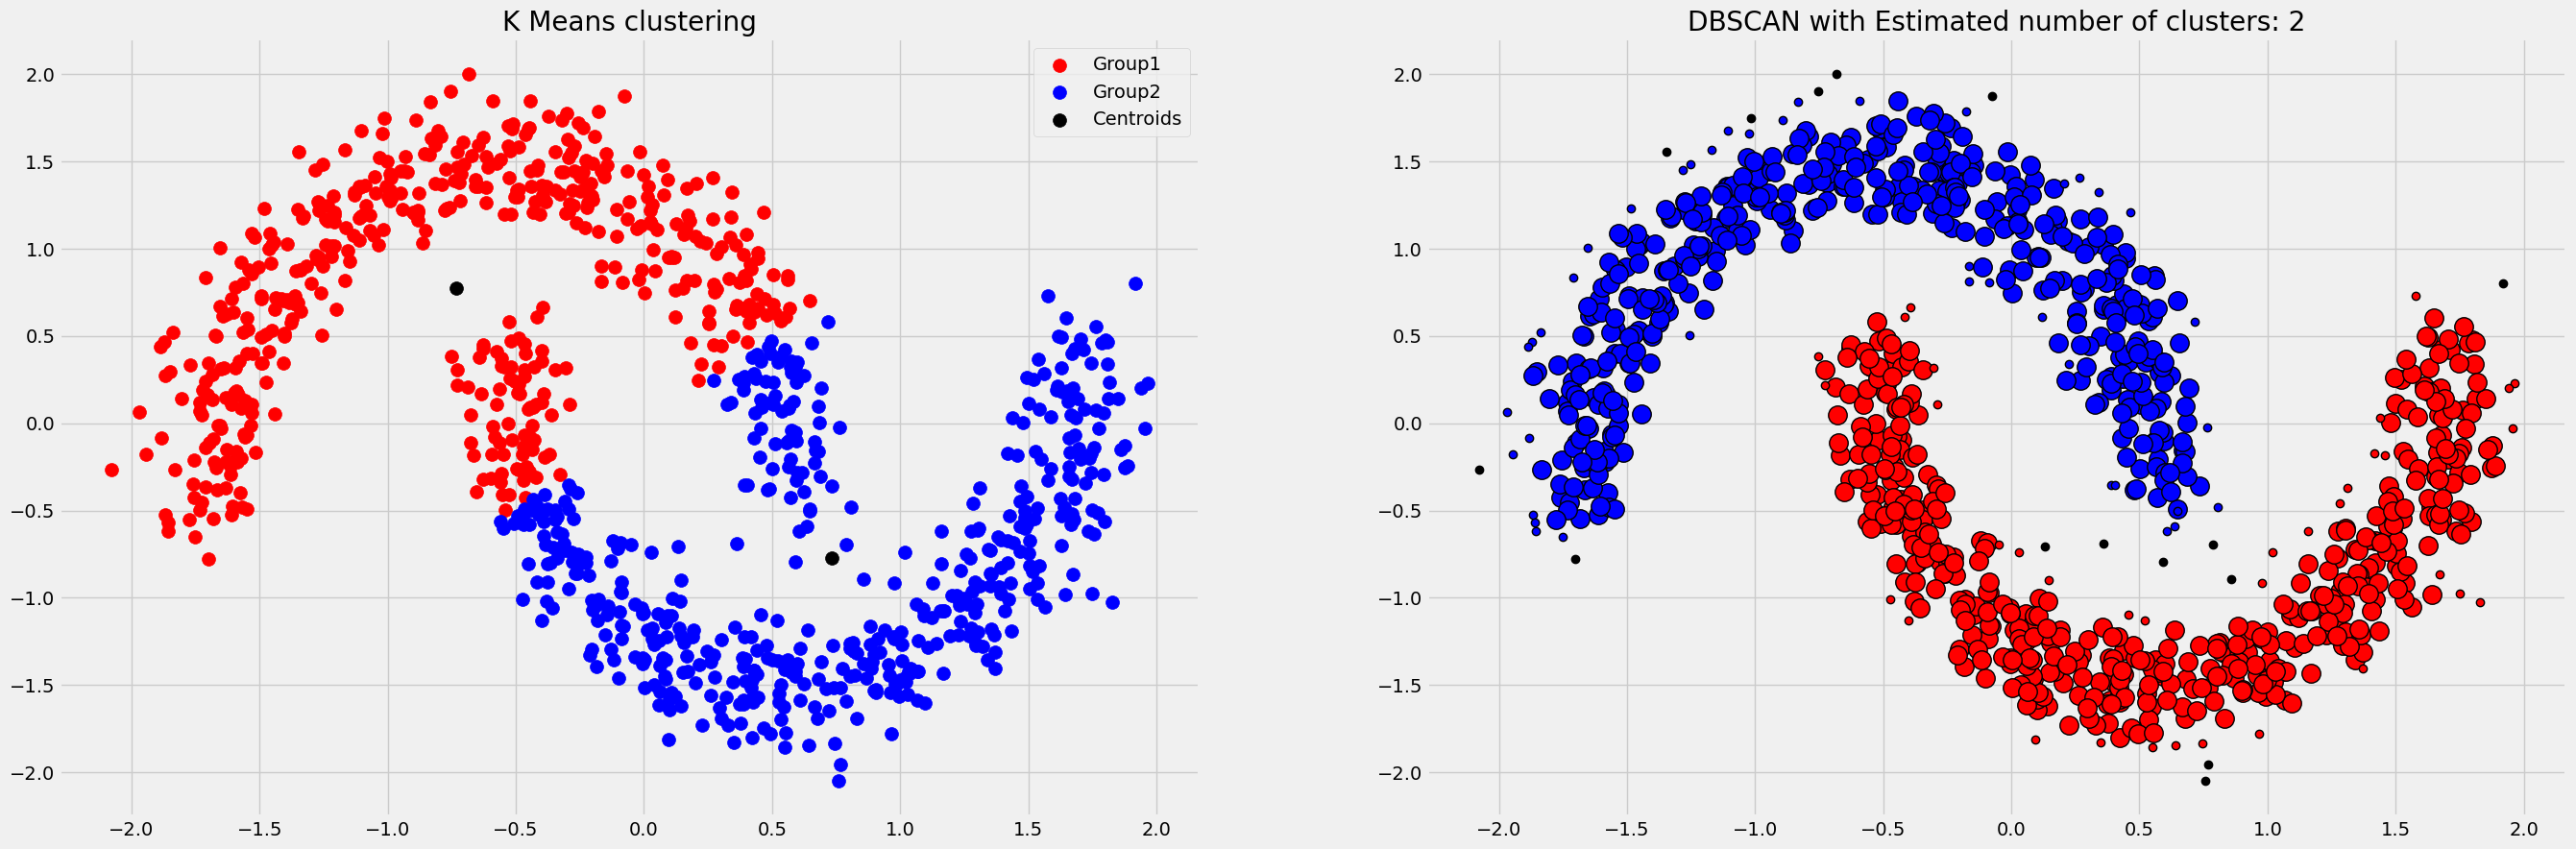

In [11]:
'''
K-means vs DBSCAN (make_moons dataset)
'''

fig, (ax1, ax2) = plt.subplots(ncols =2)
fig.set_figheight(10)
fig.set_figwidth(30)

colours = ['red','blue','green','yellow','cyan','magenta','orange','aqua','pink']
for i in range(optimal_k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colours[i], label = 'Group'+str(i+1))

# Plotting the centroids of the clusters
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'black', label = 'Centroids')
ax1.set_title("K Means clustering")
ax1.legend()


# Black removed and is used for noise instead.
unique_labels = set(labels)
for k, col in zip(unique_labels, colours):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax2.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=(col),
             markeredgecolor='k', markersize=6)

ax2.set_title('DBSCAN with Estimated number of clusters: %d' % n_clusters_)

## DBSCAN Usage & Hyperparameter setting
> Necessity of parameter tuning

In [12]:
# data2 re-load (make_moons)
X, y = make_moons(n_samples=500, noise=0.1)

df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.874251,0.545249
0,-0.655404,0.705235
1,1.745036,-0.111074
1,2.060300,0.213895
1,1.739795,-0.309150


In [13]:
# DBSCAN method define & train
'''
default setting: eps=0.5, min_samples=5
- eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
- min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
'''
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)
dbscan_cluster1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

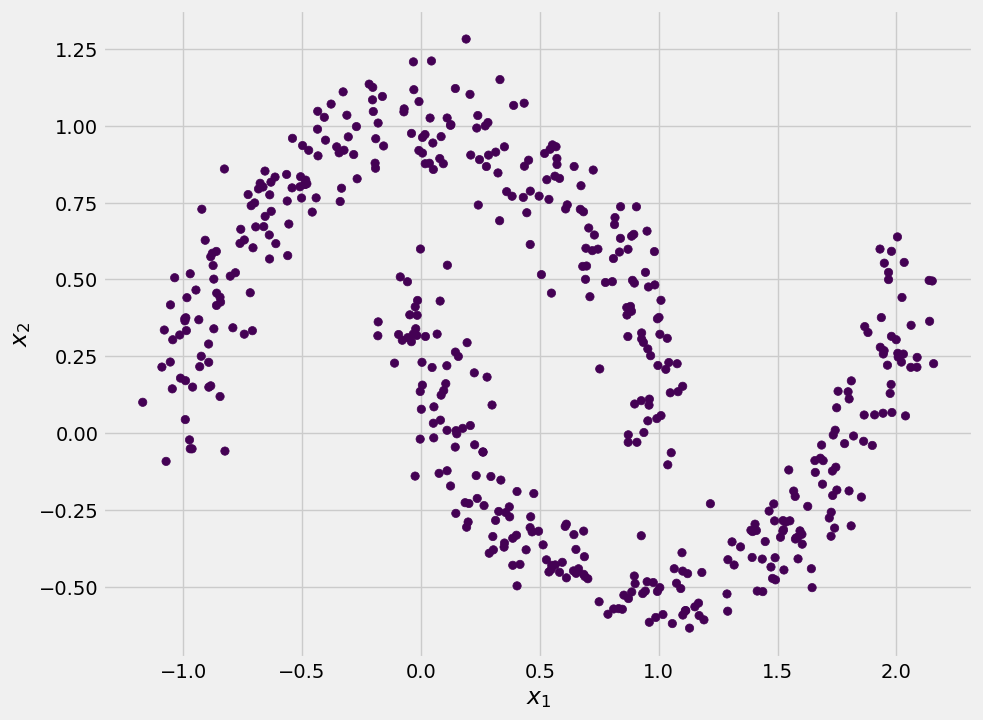

In [14]:
# Visualizing DBSCAN (default setting)
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0],
            X[:, 1],
            c = dbscan_cluster1.labels_,
            label = y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [15]:
# Number of Clusters
labels = dbscan_cluster1.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
'''
v_measure_score
  - sklearn.metrics.v_measure_score(labels_true, labels_pred, *, beta=1.0)
  - 의미: 균질성과 완전성 간의 조화 평균 값
  - v = (1 + beta) * homogeneity * completeness / (beta * homogeneity + completeness)
'''
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


In [16]:
# Visualizing DBSCAN (parameter tuning)
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)
dbscan_cluster.labels_

array([ 0,  1,  2,  3,  2,  4,  2,  4,  5, -1,  1,  0,  6,  2,  3, -1, -1,
        0,  2,  7, -1,  3,  6, -1,  5,  2, -1,  1,  2,  8, -1,  1,  1,  4,
        0,  6, -1,  4, -1,  6,  2,  0,  1,  4,  7, -1,  7, 11,  2, -1,  4,
        8,  7,  5,  5,  2,  2,  7, 10,  2,  4,  1,  5,  6,  4,  3,  2,  6,
        0,  2, 11,  0,  6,  5, -1,  5,  6,  4,  0,  0,  3,  1,  6,  6,  1,
        7,  8,  9,  7,  1, -1,  1,  2,  4,  8,  3,  1, -1,  2,  7,  9,  4,
        4, 10,  6, -1, -1,  3, -1,  6,  5,  6,  2,  8,  4,  1,  7, -1,  6,
        4,  1,  1, -1, 12, -1,  5,  4, 10,  8, 11, 10,  3,  1,  0,  7,  1,
        2,  1,  5,  4,  1,  0,  8, 11, -1,  4,  4,  6, -1,  1, -1, 11, -1,
        4, -1,  6,  4, 10,  4, 12,  1,  1,  1,  3,  6,  8,  6,  2,  6,  1,
       11, 11,  4, 12,  9,  2,  4,  3,  2,  8,  7, 11, -1, -1,  2, 11,  5,
       -1, -1,  4,  3,  7, -1,  1,  7,  2,  5,  1,  6,  1,  7,  5,  7,  7,
       -1, -1,  1, -1,  1, 10,  4, 11, 12,  6, 10,  4, 10,  4,  5,  6, -1,
        8, -1,  5,  0,  0

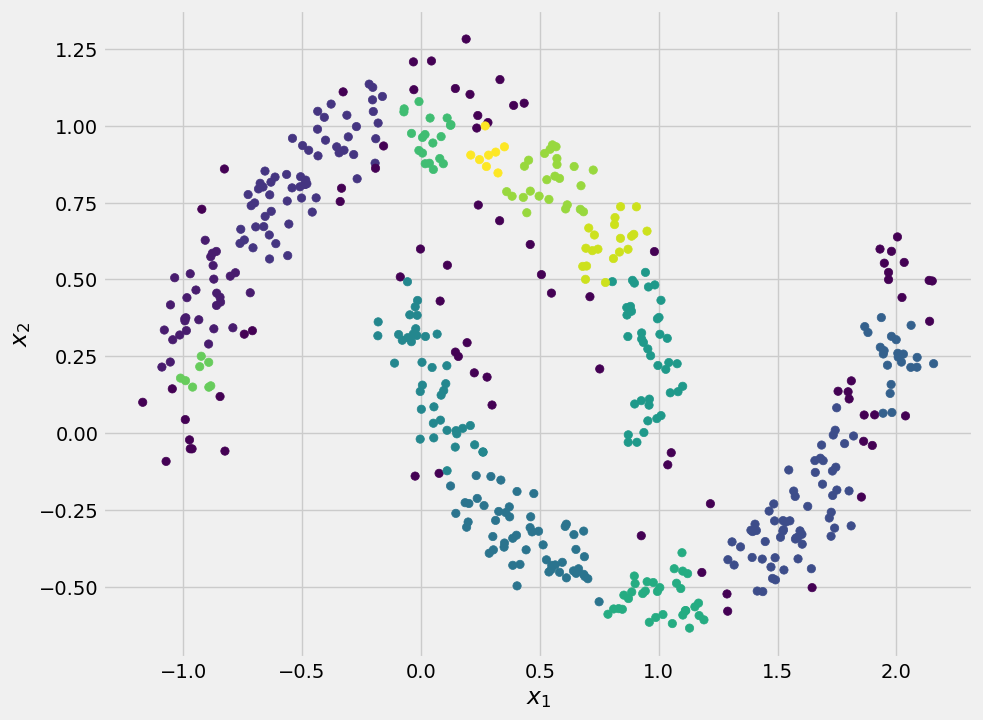

In [17]:
# Visualizing DBSCAN (parameter tugning)
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0],
X[:, 1],
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [18]:
# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure (Score between 0.0 and 1.0. 1.0 stands for perfectly complete labeling (동질성과 완전성 간의 조화 평균))
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 13
Estimated no. of noise points: 79
v_measure = 0.36883658538887276


> Find the Optimal value of Epsilon

- elbow point detection method to arrive at a suitable value of epsilon

In [19]:
'''
적절한 MinPts 값을 확인하기 위해, 각 점에서의 k-nearest neighbors 계산 가능하며
average k-distance graph를 구성하여 가장 경사도가 높은 지점(elbow point)을 optimal value로 선정함
'''

# k-nearest neighbors define & train
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)
neighbors

NearestNeighbors(n_neighbors=11)

In [20]:
# distance 계산 및 오름차순 정렬
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

print("distances:", distances[:10])
print("indices:", indices[:10])

distances: [0.06551034 0.06646508 0.06746388 0.06938273 0.06945074 0.07038817
 0.07040158 0.07040158 0.07062059 0.07111539]
indices: [[  0 244 286 322 306 387 224 133 295 468 451]
 [  1 199 325 434 348 132 161 272 357 481  42]
 [  2 448 388 261 328   6  25 335  69  56 308]
 [  3 361 163  14 190  80  95 290 483 229 305]
 [  4  98 339 336 299  56 328 340 289 472 445]
 [  5 341 283 461 172 239 176  43 391 494 363]
 [  6 335  56 448 328 388   2  69 261 340 336]
 [  7 232 395 119 189 492  60 145 495 409 446]
 [  8 223 281  24 110 476  53  62 410 475 274]
 [  9 489 253 297 301 394 337 480 422  92 459]]


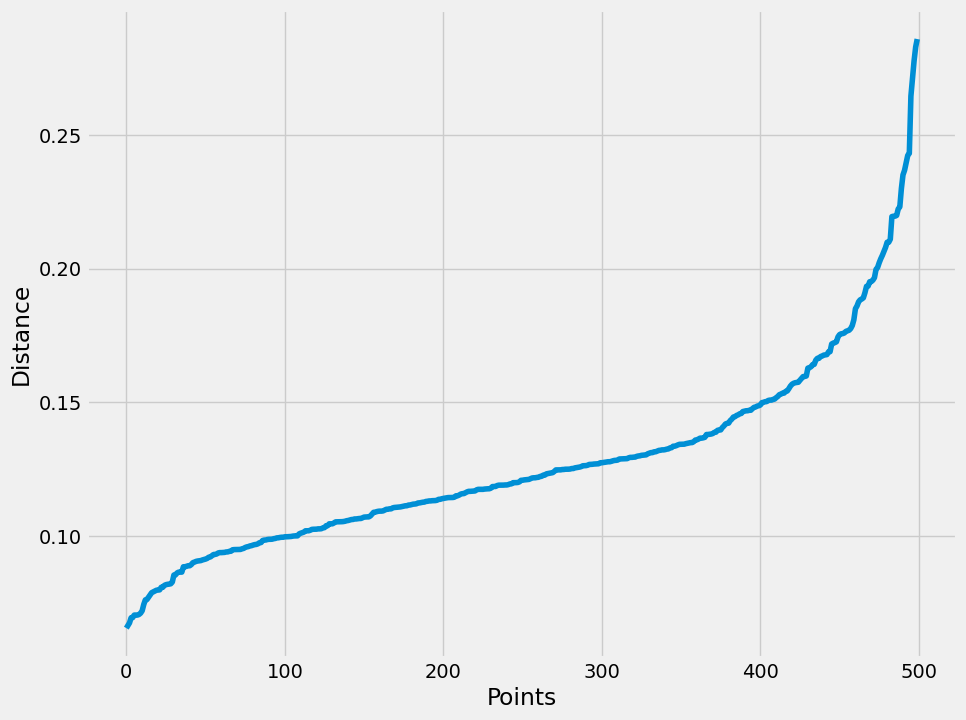

In [21]:
# visualize the distances
fig = plt.figure(figsize=(10, 8))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

In [22]:
# knee point 찾는 알고리즘 활용을 위한, 설치 작업
!pip install kneed

In [23]:
# package load
from kneed import KneeLocator

# Knee point location 찾기
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial') # S: sensitivity (작을수록 민감함)
print("knee point index: ", knee.knee)

knee point index:  422


<Figure size 1000x800 with 0 Axes>

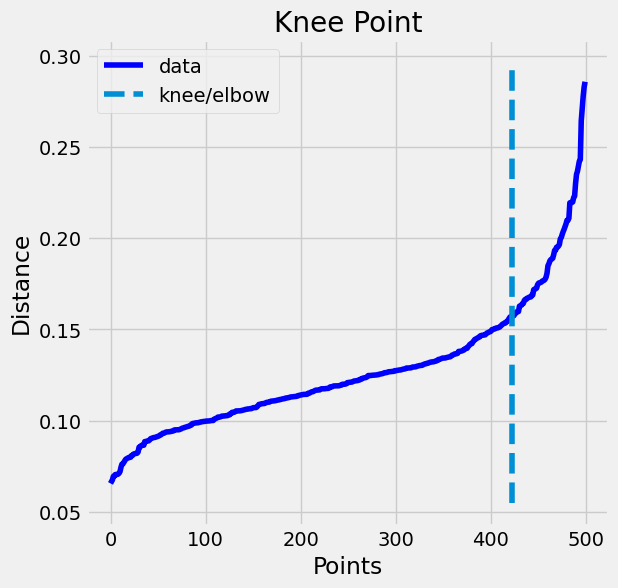

distance of knee point 0.1572877488128666


In [24]:
# visualize the knee point
fig = plt.figure(figsize=(10, 8))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()

print("distance of knee point", distances[knee.knee])

> Applying DBSCAN with optimal value of Epsilon (Epsilon = 0.163)

In [25]:
# DBSCAN model define & train
dbscan_cluster = DBSCAN(eps=0.172, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.172, min_samples=8)

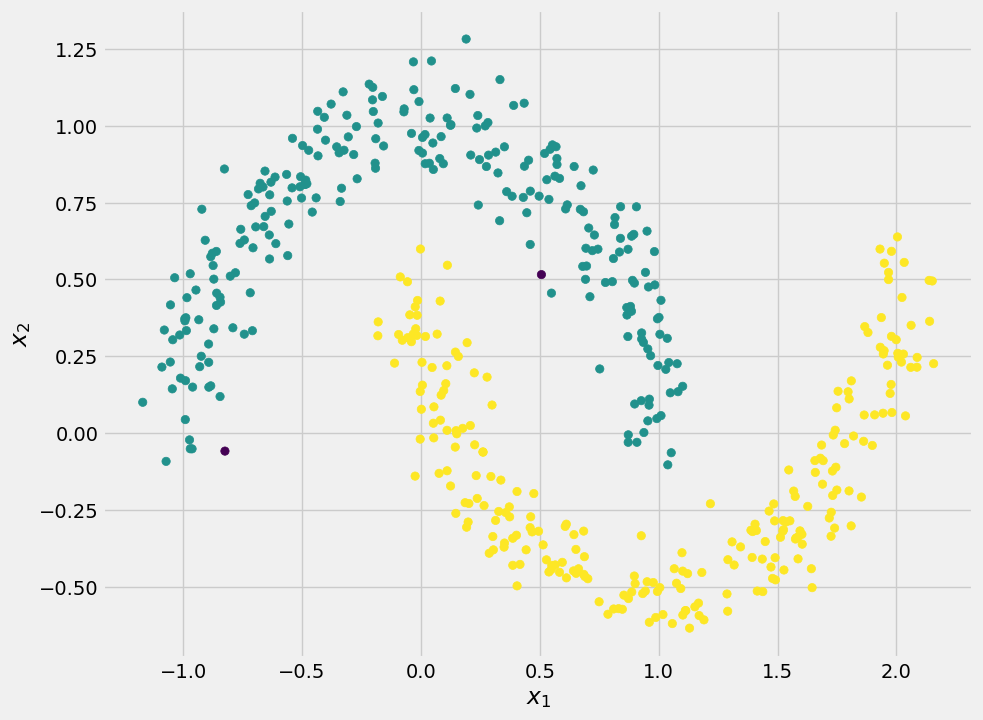

In [26]:
# Visualizing DBSCAN
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0],
X[:, 1],
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [27]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 2
v_measure = 0.9834723670647001
